# Data Wrangling of WeRateDogs

### by Choke Estifanos


# Import Python Libraries

In [1]:
import pandas as pd
import requests
import json
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gather

In [2]:

twitter_archive = pd.read_csv("twitter-archive-enhanced-2.csv")
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions-3.tsv', 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_predictions-3.tsv', sep='\t')  

In [3]:
'''import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''


'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = twitter

In [4]:
# Read tweet's JSON data line by line 
twitter_data = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        
        # Append to list of dictionaries
        twitter_data.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
twitter_df = pd.DataFrame(twitter_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
twitter_df.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assess

In [5]:
# Display the first three rows
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [6]:
#Display the last three rows
twitter_archive.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
# Show random rowsof a dataset
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1563,688179443353796608,NaN,NaN,2016-01-16 02:02:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lizzie. She's about to fist bump the l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688179443...,10,10,Lizzie,None,None,pupper,None
2077,670833812859932673,NaN,NaN,2015-11-29 05:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jett. He is unimpressed by flower. 7/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670833812...,7,10,Jett,None,None,None,None
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,None,None,None,None
2303,666996132027977728,NaN,NaN,2015-11-18 15:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carll. He wants to be a donkey. But al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666996132...,10,10,Carll,None,None,None,None
233,847842811428974592,NaN,NaN,2017-03-31 16:07:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Rontu. He is described as a pal, cuddl...",NaN,NaN,NaN,"https://www.gofundme.com/help-save-rontu,https...",12,10,Rontu,None,None,None,None
1356,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703425003...,9,10,None,None,None,None,None
297,837110210464448512,NaN,NaN,2017-03-02 01:20:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837110210...,13,10,Clark,None,None,pupper,None
1136,728387165835677696,NaN,NaN,2016-05-06 00:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Enchilada (yes, that's her real name)....",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728387165...,12,10,Enchilada,None,None,None,None
637,793286476301799424,NaN,NaN,2016-11-01 03:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
2218,668507509523615744,NaN,NaN,2015-11-22 19:13:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668507509...,10,10,a,None,None,None,None


In [8]:
# Show the info about the dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# Display a brief summary of the dataset
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# Display total null values in each column
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
# Count values of a "source" column
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
# Display the first five rows of a dataset
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
# Display the last five rows of a dataset
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
# Show the info about the dataset
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# A brief summary of the dataset
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [17]:
# Show the info about the dataset
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(twitter_df))
print(all_columns)
all_columns[all_columns.duplicated()]

0                       tweet_id
1          in_reply_to_status_id
2            in_reply_to_user_id
3                      timestamp
4                         source
5                           text
6            retweeted_status_id
7       retweeted_status_user_id
8     retweeted_status_timestamp
9                  expanded_urls
10              rating_numerator
11            rating_denominator
12                          name
13                         doggo
14                       floofer
15                        pupper
16                         puppo
17                      tweet_id
18                       jpg_url
19                       img_num
20                            p1
21                       p1_conf
22                        p1_dog
23                            p2
24                       p2_conf
25                        p2_dog
26                            p3
27                       p3_conf
28                        p3_dog
29                      tweet_id
30        

17    tweet_id
29    tweet_id
dtype: object

#### Quality Issues

##### twitter_archive table
* A bunch of unwanted columns for analysis 
* Wrong datatype for "timestamp" column
* Some "rating_denominator" column values are different from 10
* "rating_numerator" column values are greater than 15
* "source" column are not more readable
* Too many words like a, an, this, very and etc. which are not dog names
* A "None" value in a "dog_stage" column

##### image_predictions
* some rows without image
* too many columns not important for my analysis except "tweet_id", and "jpg_url"


#### Tidiness Issues
* doggo, pupper, puppo, and floofer in different columns instead of in a column
* twitter_archive, image_predictions, and twitter_df are the separate tables

# Clean

In [19]:
# Copy all datasets before cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_df_clean = twitter_df.copy()

### Twitter Archive 

In [20]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### Quality Issues

###### Define: #1
* Drop all unneeded columns from the data

###### Code

In [21]:
# Drop some columns 
twitter_archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

###### Test

In [22]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


###### Define: #2
* Convert the "timestamp" datatype to datetime

###### Code

In [23]:
# Convert timestamp colunm to datetime
twitter_archive_clean["timestamp"]= pd.to_datetime(twitter_archive_clean["timestamp"])

###### Test

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 202.6+ KB


###### Define: #3
* Replace any rating_denominator which are different to 10

###### Code

In [25]:
rating =[ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40, 130, 110,  16, 120,   2]
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.replace(rating, 10)


###### Test

In [26]:
# the unique value in the rating_denominator column after replacing values that are not 10
twitter_archive_clean.rating_denominator.unique()

array([10], dtype=int64)

###### Define: #4
*  Drop of all other rows because most of the numerator ratings fell in between 0-15

###### Code

In [27]:
# Extract all rows with rating_numerator <= 15
twitter_archive_clean =twitter_archive_clean[twitter_archive_clean.rating_numerator <= 15]
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


###### Test

In [28]:
twitter_archive_clean.rating_numerator.unique()

array([13, 12, 14,  5, 11, 10,  6, 15,  0,  7,  9,  8,  1,  3,  4,  2],
      dtype=int64)

##### Tidiness

###### Define: #1
* Melt the doggo, pupper, puppo, and floofer columns

###### Code

In [29]:
#Melting the doggo, pupper, puppo, and floofer columns
twitter_archive_clean = pd.melt(twitter_archive_clean, ["tweet_id", "timestamp", "source", "text", "rating_numerator", "rating_denominator", "name"], value_name="dog_stage")
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,variable,dog_stage
779,773985732834758656,2016-09-08 20:45:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winnie. She just made awkward eye contact...,11,10,Winnie,doggo,None
5816,720785406564900865,2016-04-15 01:26:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He hears everything you say. D...,12,10,Archie,pupper,None
4075,678389028614488064,2015-12-20 01:38:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,11,10,Bella,floofer,None
918,754482103782404096,2016-07-17 01:05:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He's currently plotting his reve...,10,10,Milo,doggo,None
6753,670417414769758208,2015-11-28 01:42:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Sharp dog here. Introverted. Loves purple. Not...,6,10,None,pupper,None
4323,672139350159835138,2015-12-02 19:44:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,12,10,None,floofer,None
3884,687494652870668288,2016-01-14 04:41:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Marq. He stole this car. 7/10 wtf Marq...,7,10,Marq,floofer,None
2118,669942763794931712,2015-11-26 18:16:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Andru. He made his very own lacrosse s...,11,10,Andru,doggo,None
356,829449946868879360,2017-02-08 22:00:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a stressed doggo. Had a long day. Many ...,11,10,None,doggo,doggo
4555,667806454573760512,2015-11-20 20:47:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Filup. He is overcome with joy after f...,10,10,Filup,floofer,None


In [30]:
# Drop "variable" column
twitter_archive_clean.drop(columns= "variable", axis= 1, inplace=True)
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9320 entries, 0 to 9319
Data columns (total 8 columns):
tweet_id              9320 non-null int64
timestamp             9320 non-null datetime64[ns, UTC]
source                9320 non-null object
text                  9320 non-null object
rating_numerator      9320 non-null int64
rating_denominator    9320 non-null int64
name                  9320 non-null object
dog_stage             9320 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 582.6+ KB


In [32]:
# keep one of the duplicates with "None"
df1_duplicate= twitter_archive_clean.drop_duplicates(subset= ['tweet_id', 'dog_stage'])
df1_duplicate.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None


In [33]:
# # Keep rows with dog stage
dup = twitter_archive_clean.duplicated(subset='tweet_id', keep = False)
df2_duplicate = twitter_archive_clean[dup]
df2_duplicate = df2_duplicate[df2_duplicate.dog_stage != 'None']

In [34]:
#Combine df1_duplicate and df2_duplicate
df1_duplicate = df1_duplicate.drop_duplicates(subset = 'tweet_id', keep = False)


twitter_archive_clean= df1_duplicate.append(df2_duplicate)

In [35]:
twitter_archive_clean.dog_stage.value_counts(dropna=False)

None       1951
pupper      256
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [36]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Koda', 'Bruno', 'Ted', 'Oliver', 'Jim', 'Zeke', 'Ralphus',
       'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya', 'Mingus', 'Derek',
       'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl', 'Lola', 'Kevin',
       'Noah', 'Bella', 'Rusty', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Walter', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Gizmo',
       'Cooper', 'Harold', 'Lili', 'Sammy', 'Meatball', 'Paisley',
       'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey', 'Dave', 'Jersey',
       'Hobbes', 'Burt', 'Lorenzo', 'Carl', 'Jordy', 'Milky', 'Trooper',
       'Winston', 'Sophie', 'Wyatt', 'Rosie', 'Thor', 'Oscar

###### Test

In [37]:
twitter_archive_clean.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
7926,752519690950500352,2016-07-11 15:07:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,11,10,None,puppo
7940,751132876104687617,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,10,10,Cooper,puppo
8013,744995568523612160,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,9,10,Abby,puppo
8026,743253157753532416,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,puppo
8061,738537504001953792,2016-06-03 01:07:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,11,10,Bayley,puppo


##### Quality Issues

###### Define: #5
* Clean the source column to make more readable

###### Code

In [38]:

twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

###### Test

In [39]:
twitter_archive_clean.sample(15)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
316,834209720923721728,2017-02-22 01:14:30+00:00,Twitter for iPhone,This is Wilson. He's aware that he has somethi...,12,10,Wilson,None
2049,670840546554966016,2015-11-29 05:43:44+00:00,Twitter for iPhone,Meet Colby. He's that one cool friend that get...,10,10,Colby,None
1553,687664829264453632,2016-01-14 15:57:26+00:00,Twitter for iPhone,Meet Opal. He's a Belgian Dijon Poofster. Upse...,11,10,Opal,None
1216,713177543487135744,2016-03-25 01:35:51+00:00,Twitter for iPhone,This is Lance. Lance doesn't give a shit. 10/1...,10,10,Lance,None
411,822489057087389700,2017-01-20 17:00:46+00:00,Twitter for iPhone,This is Paisley. She really wanted to be presi...,13,10,Paisley,None
2325,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None
5536,759943073749200896,2016-08-01 02:45:22+00:00,Vine - Make a Scene,Here's a wicked fast pupper. 12/10 camera coul...,12,10,None,pupper
2007,671763349865160704,2015-12-01 18:50:38+00:00,Twitter for iPhone,Say hello to Mark. He's a good dog. Always rea...,9,10,Mark,None
5744,736365877722001409,2016-05-28 01:18:00+00:00,Twitter for iPhone,This is Rory. He's extremely impatient. 11/10 ...,11,10,Rory,pupper
1805,676237365392908289,2015-12-14 03:08:46+00:00,Twitter for iPhone,Say hello to Winston. He has no respect for th...,8,10,Winston,None


###### Define: #6
* Convert the words which are not dog names to NAN

###### code

In [40]:
not_dog_name = ["None", "such", "a", "quite", "not", "one", "incredibly", "mad", "an", "just", "my", "his", "actually", "this", "unacceptable", "all", "the", "by", "officially", "life", "light", "space", "very", "old" ]

for value in not_dog_name:
    twitter_archive_clean["name"]= twitter_archive_clean["name"].replace(value, np.nan )    

###### Test

In [41]:
# No error means the test is good
for value in not_dog_name:
    assert value not in twitter_archive_clean.name.values 

###### Define: #7
* Convert "None"  from dog_stage column to NAN

###### Code

In [42]:
twitter_archive_clean.dog_stage= twitter_archive_clean.dog_stage.replace("None", np.nan)

###### Test

In [43]:
twitter_archive_clean.dog_stage.value_counts(dropna= False)

NaN        1951
pupper      256
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

### Image Predictions

In [44]:
image_predictions_clean = image_predictions.copy()

##### Quality Issues

###### Define: #8 
* Remove rows without image

###### Code

In [45]:
# Extract rows only with image
image_predictions_clean = image_predictions_clean[image_predictions_clean.jpg_url.str.endswith("jpg")]

###### Test

In [46]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2073 non-null int64
jpg_url     2073 non-null object
img_num     2073 non-null int64
p1          2073 non-null object
p1_conf     2073 non-null float64
p1_dog      2073 non-null bool
p2          2073 non-null object
p2_conf     2073 non-null float64
p2_dog      2073 non-null bool
p3          2073 non-null object
p3_conf     2073 non-null float64
p3_dog      2073 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.0+ KB


###### Define: #9
* Drop all columns from the image predictions data except "tweet_id" and "jpg_url" 

###### Code

In [47]:
image_column = ['img_num','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_predictions_clean.drop(image_column, axis=1, inplace=True)

###### Test

In [48]:
image_predictions_clean.head()

,tweet_id,jpg_url
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg


### Retweet

In [49]:
twitter_df_clean = twitter_df.copy()
twitter_df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


##### Tidiness

###### Define : #2
* Merge twitter_archive_clean, twitter_df_clean and image_predictions_clean into one combined data

###### Code

In [50]:
# Merge twitter_archive_clean and twitter_df_clean
df1_merge =pd.merge(twitter_archive_clean, twitter_df_clean, on= "tweet_id", how= "left")
# merge df1_merge and image_predictions_clean 
combined_data = pd.merge(df1_merge, image_predictions_clean, on= "tweet_id", how= "left")

###### Test

In [51]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2343
Data columns (total 11 columns):
tweet_id              2344 non-null int64
timestamp             2344 non-null datetime64[ns, UTC]
source                2344 non-null object
text                  2344 non-null object
rating_numerator      2344 non-null int64
rating_denominator    2344 non-null int64
name                  1503 non-null object
dog_stage             393 non-null object
retweet_count         2342 non-null float64
favorite_count        2342 non-null float64
jpg_url               2067 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 219.8+ KB


###### Define: #10
* Change datatypes of retweet_count and favorite_count to int

###### Code

In [52]:
# Drop rows with null values from the columns
combined_data = combined_data.dropna(subset= ["retweet_count", "favorite_count"])

In [53]:
# convert datatype of "tweet_id" to str
combined_data.tweet_id = combined_data.tweet_id.astype(str)

#Convert datatypes of,retweet_count and favorite_count columns to int
combined_data.retweet_count = combined_data.retweet_count.astype(int)
combined_data.favorite_count = combined_data.favorite_count.astype(int)

###### Test

In [54]:
# The combined data info after merge
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2343
Data columns (total 11 columns):
tweet_id              2342 non-null object
timestamp             2342 non-null datetime64[ns, UTC]
source                2342 non-null object
text                  2342 non-null object
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
name                  1502 non-null object
dog_stage             392 non-null object
retweet_count         2342 non-null int32
favorite_count        2342 non-null int32
jpg_url               2065 non-null object
dtypes: datetime64[ns, UTC](1), int32(2), int64(2), object(6)
memory usage: 201.3+ KB


# Analysis

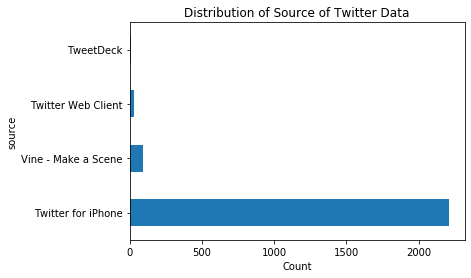

In [55]:
# Plot "source" value counts
combined_data.source.value_counts().plot.barh()
plt.xlabel("Count")
plt.ylabel("source")
plt.title("Distribution of Source of Twitter Data");

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


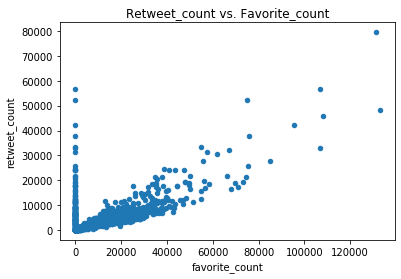

In [56]:
# Scatter plot of "favorite_count" vs. "retweet_count"
combined_data.plot.scatter(x= "favorite_count", y= "retweet_count")
plt.title("Retweet_count vs. Favorite_count");

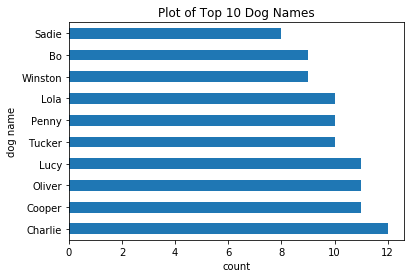

In [57]:
# Top ten dog names
combined_data.name.value_counts().head(10).plot.barh()
plt.xlabel("count")
plt.ylabel("dog name")
plt.title("Plot of Top 10 Dog Names");

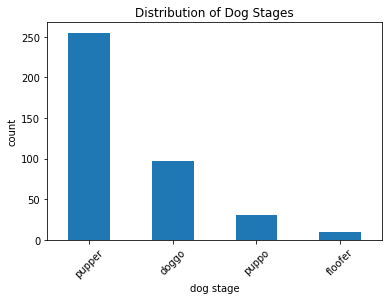

In [58]:
# Distribution of a "dog_stage" column
combined_data.dog_stage.value_counts().plot.bar()
plt.xticks(rotation = 45)
plt.xlabel("dog stage")
plt.ylabel("count")
plt.title("Distribution of Dog Stages");

# Export combined and cleaned data as a csv file

In [59]:
combined_data.to_csv("twitter_archive_master.csv", index = False)